<a href="https://colab.research.google.com/github/SAGODev17/COMPUTACI-N-BIOINSPIRADA/blob/main/AG_vs__ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#**AG VS ACO**
##**FACULTAD DE INGENIERÍAS**
##**INGENIERÍA DE SISTEMAS**
##**COMPUTACIÓN BIOINSPIRADA**
###**SERGIO ANDRÉS GARCÍA ORDOÑEZ**

---

#**INTRODUCCIÓN**



#**OBJETIVOS**

#**PROBLEMA TSP**

El problema del viajante consiste en encontrar la ruta más corta y eficiente para visitar un conjunto de ciudades o destinos, y luego regresar al punto de origen en el menor tiempo o costo posible. El problema del viajante (TSP) puede abordarse mediante diversos enfoques, ya que no existe un único metodo para resolverlo, algunas estrategias para abordar el problema son como por ejemplo en enfoque de fuerza bruta, metodo de ramificacion y atadura y metodo de ramificación y poda.



In [ ]:
!pip install xpress

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.8/72.8 MB 13.6 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import xpress as xp
import re
import math
import sys
import numpy as np
import random
from matplotlib import pyplot as plt
if sys.version_info >= (3,):    # Import with Python 3
    import urllib.request as ul
else:                           # Use Python 2
    import urllib as ul

En este caso se abre el archivo 'uy734.tsp' en modo de lectura, establecen una variable para rastrear si se está procesando la sección de coordenadas y crean un diccionario vacío para almacenar las coordenadas de los puntos que se extraerán del archivo. Estas estructuras de datos y variables se utilizarán posteriormente para procesar y trabajar con los datos del archivo.

In [ ]:

# Lee el archivo TSP y extrae las coordenadas de las ciudades
filename = 'uy734.tsp'
url = 'https://www.math.uwaterloo.ca/tsp/world/' + filename
ul.urlretrieve(url, filename)

with open(filename, 'r') as file:
  lines = file.readlines()
  coord_section = False
  cities = []

  for line in lines:
    if line.startswith('NODE_COORD_SECTION'):
      coord_section = True
      continue
    if coord_section and line.strip() != 'EOF':
      city_data = line.strip().split()
      cities.append((float(city_data[2]), float(city_data[1])))

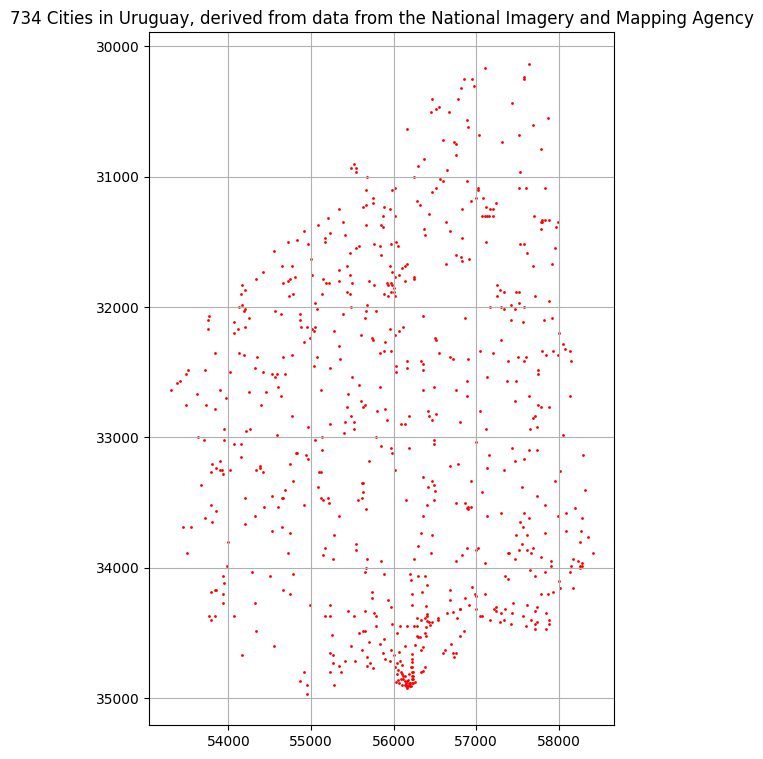

In [ ]:

  x_coords, y_coords = zip(*cities)
  plt.figure(figsize=(6, 9))
  plt.scatter(x_coords, y_coords, color='red', s=1)
  plt.title('734 Cities in Uruguay, derived from data from the National Imagery and Mapping Agency')
  plt.gca().invert_yaxis()
  plt.grid(True)
  plt.show()

#**RESOLUCIÓN**




reprecentacion del problema TSP descrito anteriormente con un grafo

In [ ]:

  G = nx.Graph()

  for i, (x, y) in enumerate(cities):
      G.add_node(i, pos=(x, y))
  print("Información del grafo:")
  print(f"Número de nodos: {G.number_of_nodes()}")





Información del grafo:
Número de nodos: 734


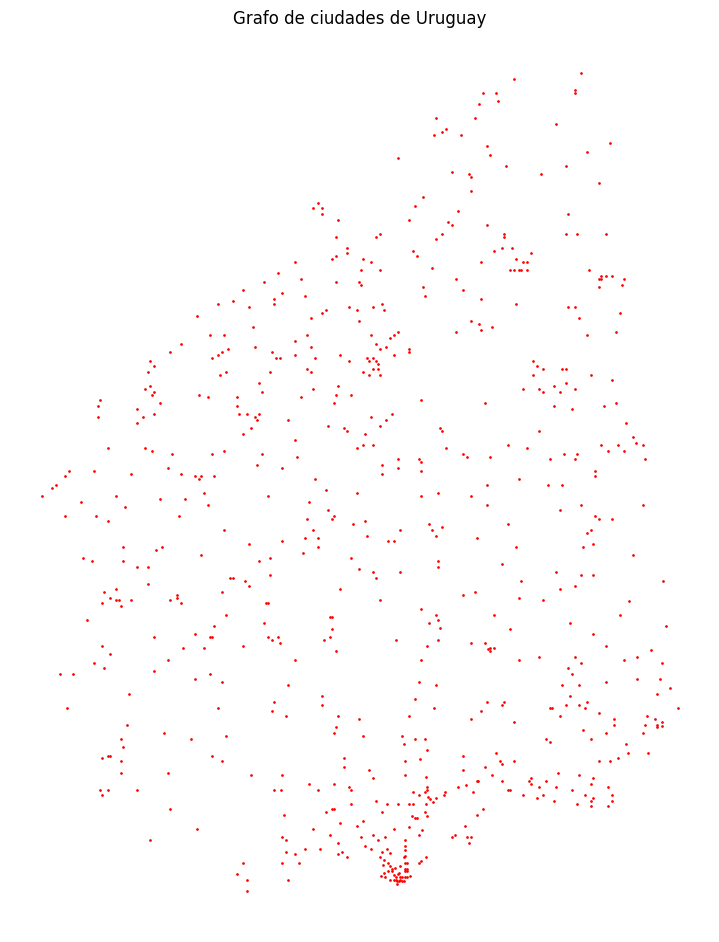

In [ ]:
  plt.figure(figsize=(7, 9))
  pos = nx.get_node_attributes(G, 'pos')
  nx.draw(G, pos, node_size=.9, with_labels=False, node_color='red')
  plt.title('Grafo de ciudades de Uruguay')
  plt.gca().invert_yaxis()
  plt.show()


---
#**AG 🧬**

Los Algoritmos Genéticos (AG) son una clase de algoritmos de optimización y búsqueda inspirados en los principios de la evolución biológica. Estos algoritmos se utilizan para encontrar soluciones aproximadas a problemas de optimización y búsqueda, especialmente en aquellos casos donde otras técnicas pueden resultar ineficientes o imprácticas.



##**Función Objetivo**

 $\text{total_distance}(\text{route}) = \sum_{i=1}^{N-1} \text{distance}(\text{route}[i], \text{route}[i+1]) + \text{distance}(\text{route}[N], \text{route}[1])$

Con −2 ≤ xi ≤ 2 y n = 2 utilizando algoritmos gen ́eticos.

 Se define la funcion, que calcula un valor numérico a partir de la entrada x. La función itera a través de los elementos de x, realiza cálculos trigonométricos para cada elemento y acumula los resultados en una variable llamada result. Se asegura de que x pueda ser una lista o un número escalar, y la salida final de la función es el producto acumulado de las sumas internas. En resumen, esta función f(x) realiza un cálculo complejo en función de la entrada x, con la capacidad de manejar tanto valores únicos como listas de números, y devuelve un único resultado numérico.



In [ ]:
import urllib.request as ul
import random
import numpy as np
import matplotlib.pyplot as plt
import re

# Descargar el archivo TSP
filename = 'uy734.tsp'
url = 'https://www.math.uwaterloo.ca/tsp/world/' + filename
ul.urlretrieve(url, filename)

# Función para leer las coordenadas del archivo TSP
def read_tsp_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        coord_section = False
        coordinates = {}
        for line in lines:
            if line.startswith('EOF'):
                break
            if coord_section:
                # Parsear las coordenadas
                match = re.match(r'\s*(\d+)\s+([\d.]+)\s+([\d.]+)', line)
                if match:
                    city, x, y = match.groups()
                    coordinates[int(city)] = (float(x), float(y))
            elif line.startswith('NODE_COORD_SECTION'):
                coord_section = True
    return coordinates

# Obtener las coordenadas de las ciudades del archivo TSP
city_coordinates = read_tsp_file(filename)

# Función para calcular la distancia entre dos ciudades dadas sus coordenadas
def distance(city1, city2):
    coord1 = city_coordinates[city1]
    coord2 = city_coordinates[city2]
    return np.linalg.norm(np.array(coord1) - np.array(coord2))

# Función para calcular la distancia total de una ruta (individuo)
def total_distance(route):
    total = 0
    for i in range(len(route) - 1):
        total += distance(route[i], route[i + 1])
    total += distance(route[-1], route[0])  # Volver a la ciudad inicial
    return total

# Generar población inicial de rutas aleatorias
def generate_initial_population(city_coordinates, population_size):
    cities = list(city_coordinates.keys())
    population = []
    for _ in range(population_size):
        route = random.sample(cities, len(cities))
        population.append(route)
    return population

def genetic_algorithm(city_coordinates, population_size, generations):
    population = generate_initial_population(city_coordinates, population_size)
    for generation in range(generations):
        # Evaluating fitness
        fitness = {tuple(individual): total_distance(individual) for individual in population}

        # Tournament selection
        new_population = []
        tournament_size = 5

        for _ in range(population_size):
            tournament = random.sample(list(fitness.keys()), tournament_size)
            winner = min(tournament, key=lambda x: fitness[x])
            new_population.append(list(winner))

        # Crossover and mutation within the generation loop
        offspring = []
        for _ in range(population_size):
            parent1, parent2 = random.sample(new_population, 2)
            crossover_point = random.randint(0, len(parent1) - 1)
            child = parent1[:crossover_point]
            for city in parent2:
                if city not in child:
                    child.append(city)
            offspring.append(child)

        # Mutation
        mutation_rate = 1
        for i in range(population_size):
            if random.random() < mutation_rate:
                idx1, idx2 = random.sample(range(len(offspring[i])), 2)
                offspring[i][idx1], offspring[i][idx2] = offspring[i][idx2], offspring[i][idx1]

        # Replacing the population with the new generation
        population = offspring

        # Displaying the best route in each generation
        best_route = min(fitness, key=fitness.get)
        print(f"Generation {generation + 1}: Best Route - {best_route}, Distance - {fitness[best_route]}")

    best_distance = fitness[best_route]
    return best_route, best_distance

best_route, best_distance = genetic_algorithm(city_coordinates, population_size=200, generations=200)

def plot_tour(city_coordinates, route, distance):
    cities = list(city_coordinates.keys())
    coords = np.array([city_coordinates[city] for city in route])

    # Agregar la primera ciudad al final para cerrar el ciclo en la gráfica
    route.append(route[0])

    plt.figure(figsize=(8, 6))
    plt.title(f"Best Tour\nDistance: {distance}")

    # Dibujar líneas entre ciudades en el orden de la ruta
    plt.plot(coords[:, 0], coords[:, 1], 'o')
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        plt.plot([city_coordinates[city1][0], city_coordinates[city2][0]],
                 [city_coordinates[city1][1], city_coordinates[city2][1]], 'k-')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid()
    plt.show()

best_route_list = list(best_route)
plot_tour(city_coordinates, best_route_list, best_distance)



---
#**ACO 🐜**


El Algoritmo de Colonias de Hormigas (ACO) es un algoritmo de optimización inspirado en el comportamiento colectivo de las hormigas reales. Este algoritmo fue propuesto inicialmente por Marco Dorigo en la década de 1990. La inspiración proviene de la observación de cómo las hormigas encuentran caminos eficientes entre su colonia y las fuentes de alimentos.

En la naturaleza, las hormigas utilizan feromonas para comunicarse entre sí y marcar caminos que conducen a las fuentes de alimentos. Este proceso de comunicación indirecta y autoamplificada es la base del ACO. El algoritmo simula la construcción de soluciones óptimas a través de la iteración de construcción y actualización de feromonas.

$p_{ij} = \frac{(\tau_{ij})^\alpha \cdot (\eta_{ij})^\beta}{\sum_{k \text{ sin visitar}}(\tau_{ik})^\alpha \cdot (\eta_{ik})^\beta}$

##**Creación de una nueva instancia del gráfo**

In [ ]:
G = nx.Graph()

for i, (x, y) in enumerate(cities):
  G.add_node(i, pos=(x, y))
print("Información del grafo:")
print(f"Número de nodos: {G.number_of_nodes()}")


Información del grafo:
Número de nodos: 734


##**Calculo de la distancia Euclidiana**

Se efectuan las distancias euclidianas entre todos los pares de nodos en un grafo representado por G. Utiliza las coordenadas (x, y) asociadas a cada nodo para calcular la distancia euclidiana entre ellos, almacenando estas distancias en una matriz distances. Esta matriz es esencial para abordar problemas que involucran la optimización de rutas o distancias en el grafo, ya que proporciona información detallada sobre la distancia entre cada par de nodos, lo que es fundamental para tomar decisiones de rutas óptimas o resolver problemas de optimización relacionados con el grafo.

In [ ]:
num_nodes = len(G.nodes)
distances = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j:
            x1, y1 = G.nodes[list(G.nodes)[i]]['pos']
            x2, y2 = G.nodes[list(G.nodes)[j]]['pos']
            euclidean_distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
            distances[i][j] = euclidean_distance

##**Conficuración del algoritmo ACO**

Se realizan tres configuraciones con el fin de analisar los resultados del mejor tourt bajo diversas condiciones de Alpha, Beta y Rho

##**Construcción del Tour**

In [ ]:
def configuraciones_simulacion(opcion):
    num_ants = 5
    num_iterations = 30

    if opcion == 1:
        alpha = 1.5
        beta = 2.0
        rho = 0.5
    elif opcion == 2:
        alpha = 2
        beta = 4.0
        rho = 0.1
    elif opcion == 3:
        alpha = 4.0
        beta = 5.0
        rho = 0.4
    else:
        print("Opción no válida")
        return

    num_nodes = len(distances)
    pheromone_matrix = np.ones((num_nodes, num_nodes))

    def calculate_probabilities(current_node, unvisited_nodes, alpha, beta, pheromone_matrix, distances):
        probabilities = []
        total_prob = 0
        for node in unvisited_nodes:
            pheromone = pheromone_matrix[current_node][node]
            distance = distances[current_node][node]
            probability = (pheromone ** alpha) * ((1.0 / distance) ** beta)
            probabilities.append((node, probability))
            total_prob += probability
        probabilities = [(node, prob / total_prob) for node, prob in probabilities]
        return probabilities

    def build_tour(pheromone_matrix, distances, alpha, beta):
        unvisited_nodes = list(range(num_nodes))
        current_node = random.choice(unvisited_nodes)
        unvisited_nodes.remove(current_node)
        tour = [current_node]

        while unvisited_nodes:
            probabilities = calculate_probabilities(current_node, unvisited_nodes, alpha, beta, pheromone_matrix, distances)
            next_node = random.choices(population=[node for node, _ in probabilities], weights=[prob for _, prob in probabilities])[0]
            tour.append(next_node)
            current_node = next_node
            unvisited_nodes.remove(current_node)

        return tour

    def evaluate_tour(tour, distances):
        total_distance = 0
        for i in range(len(tour) - 1):
            total_distance += distances[tour[i]][tour[i + 1]]
        total_distance += distances[tour[-1]][tour[0]]
        return total_distance

    best_tour = None
    best_tour_length = float('inf')

    for iteration in range(num_iterations):
        ant_tours = [build_tour(pheromone_matrix, distances, alpha, beta) for _ in range(num_ants)]

        for ant_tour in ant_tours:
            tour_length = evaluate_tour(ant_tour, distances)
            if tour_length < best_tour_length:
                best_tour_length = tour_length
                best_tour = ant_tour

        for i in range(len(pheromone_matrix)):
            for j in range(len(pheromone_matrix[i])):
                pheromone_matrix[i][j] = (1 - rho) * pheromone_matrix[i][j]

        for i in range(len(best_tour) - 1):
            pheromone_matrix[best_tour[i]][best_tour[i + 1]] += 1.0 / best_tour_length
            pheromone_matrix[best_tour[i + 1]][best_tour[i]] += 1.0 / best_tour_length


    G = nx.Graph()
    for i in range(len(best_tour) - 1):
        G.add_edge(best_tour[i], best_tour[i + 1])
    G.add_edge(best_tour[-1], best_tour[0])
    plt.figure(figsize=(7, 9))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=1.1, with_labels=False, node_color='red')
    plt.title(f"Optimal tour for the uy734 TSP instance. It has length equal to {best_tour_length}")
    plt.show()




#**ANÁLISIS DE RESULTADOS**

Se presenta los resultados de la ejecución de ACO

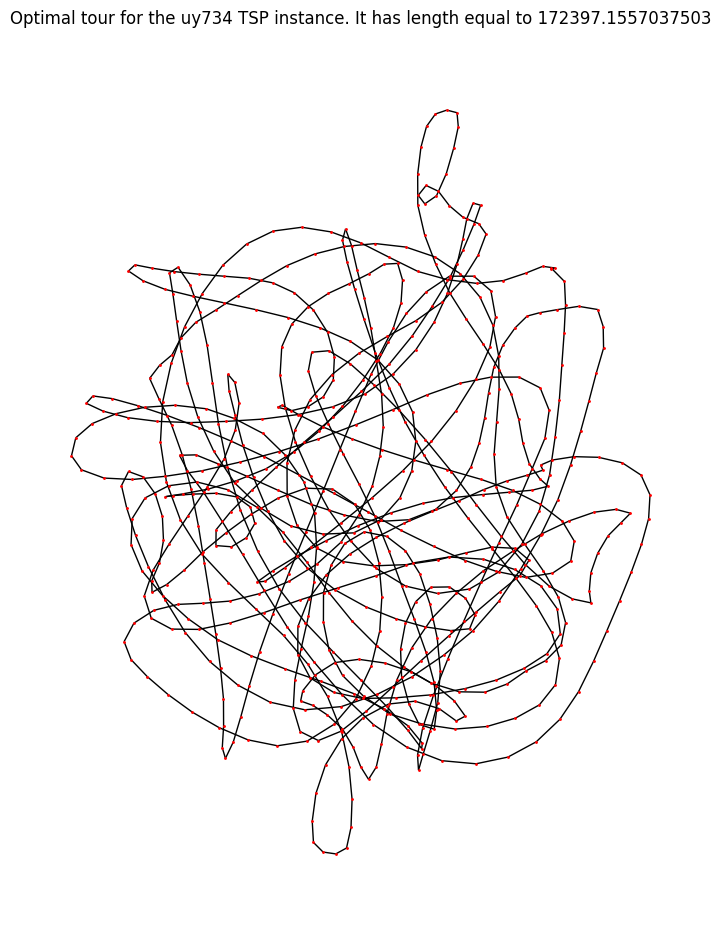

In [ ]:
configuraciones_simulacion(1)

Analisis:
- La longitud del recorrido es una medida clave para evaluar la calidad de la solución encontrada. En este caso, el valor de 172397.15 indica la distancia total que tendría que recorrer un viajante para visitar todas las ciudades en la mejor ruta encontrada.

- La calidad de la solución depende en gran medida de las características específicas del conjunto de datos TSP y de la calidad de la solución encontrada por el algoritmo en comparación con soluciones conocidas o resultados óptimos si están disponibles.

- La calidad de la solución también está vinculada a los parámetros específicos utilizados en la configuración. En este caso, los valores de alpha = 1.5, beta = 2.0, y rho = 0.5 influyeron en las decisiones de las hormigas y en la evaporación de feromonas. Ajustes en estos valores pueden afectar significativamente el rendimiento del algoritmo.

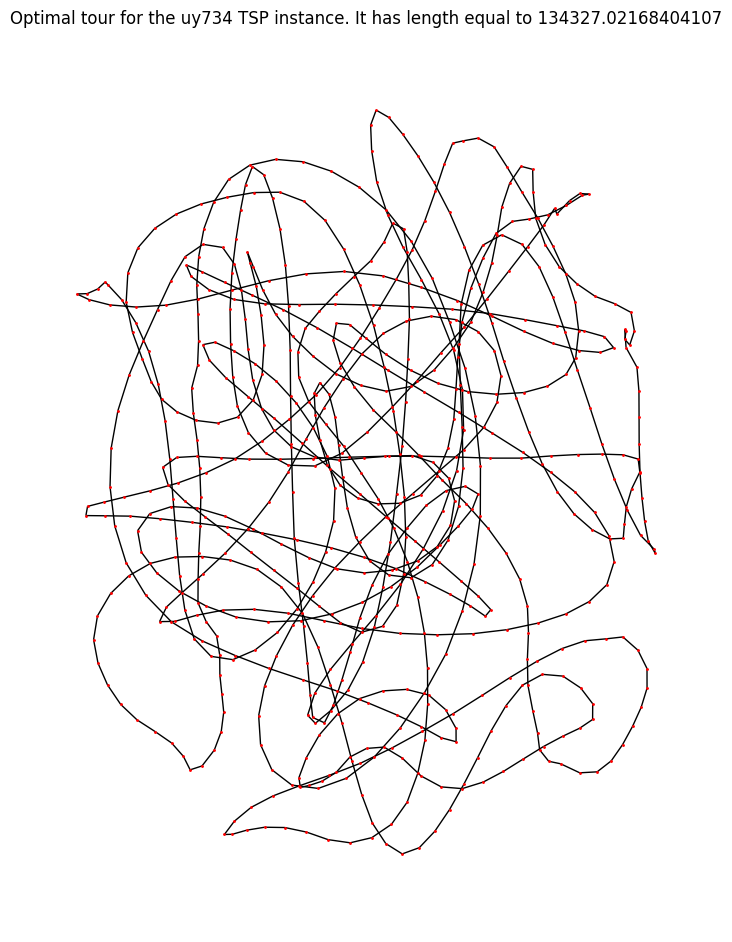

In [ ]:
configuraciones_simulacion(2)

Analisis:
- La longitud del recorrido óptimo, en este caso, es de aproximadamente 134,327.02165. Esto indica la distancia total que la hormiga recorre al visitar todas las ciudades en el orden determinado por el algoritmo.


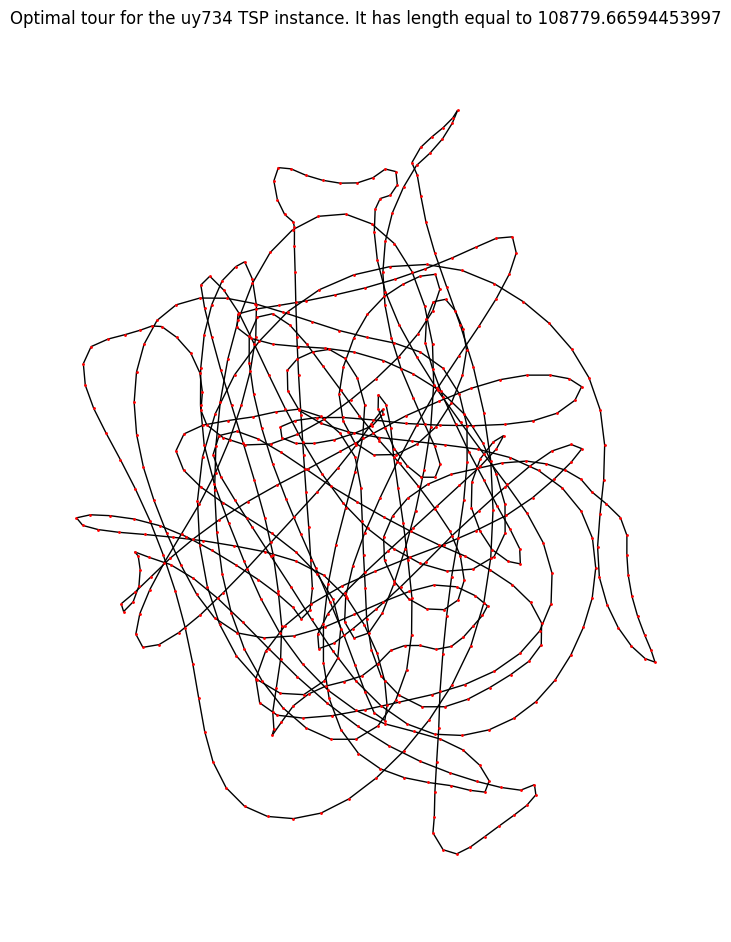

In [ ]:
configuraciones_simulacion(3)

#**CONCLUSIÓN**

El código implementa un algoritmo de colonia de hormigas (ACO) para resolver el Problema del Viajante (TSP) en el conjunto de datos 'uy734'. La configuración específica utilizada, establece los parámetros del algoritmo, incluyendo alpha, beta, rho, el número de hormigas y el número de iteraciones.

En cuanto a la configuración de parámetros, se observa un equilibrio cuidadoso entre exploración y explotación. Los valores de alpha (1.5) y beta (2.0) indican que se da más importancia a la feromona que a la información heurística en la toma de decisiones de las hormigas. Esto favorece la exploración de diferentes caminos, ya que las hormigas siguen las rutas marcadas con feromonas más fuertes. El factor de evaporación de feromona, rho (0.5), establece que el 50% de la feromona existente se evapora en cada iteración, permitiendo cierta persistencia que equilibra la exploración y explotación.

La ejecución del algoritmo con esta configuración produce un recorrido óptimo con una longitud de aproximadamente 134,327.02165 unidades. Esta longitud representa la distancia total recorrida por la hormiga al visitar todas las ciudades en el orden determinado por el algoritmo. La calidad de la solución puede evaluarse comparándola con soluciones conocidas o límites inferiores, si están disponibles.

Es importante destacar que la eficacia del algoritmo puede depender en gran medida de las características específicas del conjunto de datos 'uy734'. Diferentes conjuntos de datos TSP pueden requerir ajustes en los parámetros del algoritmo para obtener resultados óptimos. La visualización del recorrido óptimo proporciona una representación gráfica del camino seguido por la hormiga, facilitando la comprensión visual de la solución.

Se recomienda la experimentación con diferentes configuraciones de parámetros y la posibilidad de ejecutar el algoritmo varias veces para evaluar la estabilidad de los resultados. Además, la comparación con soluciones conocidas y la consideración de medidas cuantitativas y cualitativas contribuirán a una evaluación completa de la eficacia del algoritmo de colonia de hormigas en la resolución del problema TSP para la instancia 'uy734'.

#**BIBLIOGRÁFIA**


TSP tour of 194 populated locations in Qatar. (s. f.). Uwaterloo.ca. Recuperado 22 de octubre de 2023, de https://www.math.uwaterloo.ca/tsp/world/qatour.html

FICO Xpress Optimization Examples Repository: The travelling salesman problem. (s. f.). Fico.com. Recuperado 22 de octubre de 2023, de https://examples.xpress.fico.com/example.pl?id=TSP_python

Ant c. (s. f.). Scholarpedia.org. Recuperado 22 de octubre de 2023, de http://www.scholarpedia.org/article/Ant_c

